In [25]:
import numpy as np

In [4]:
import sqlite3
import pandas as pd

# Connect to your SQLite DB
conn = sqlite3.connect('../database/ipl.sqlite')



In [5]:
# Load matches table
matches = pd.read_sql_query("SELECT * FROM matches;", conn)

# Load deliveries table
deliveries = pd.read_sql_query("SELECT * FROM deliveries;", conn)


In [6]:
print("Matches shape:", matches.shape)
print("Deliveries shape:", deliveries.shape)

print("\nMatches columns:\n", matches.columns)
print("\nDeliveries columns:\n", deliveries.columns)

Matches shape: (1095, 20)
Deliveries shape: (260920, 17)

Matches columns:
 Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

Deliveries columns:
 Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [7]:
print(matches.head())
print(matches.tail())

print(deliveries.head())
print(deliveries.tail())


       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

In [8]:
print("\nMissing values in Matches:\n", matches.isnull().sum())

print("\nMissing values in Deliveries:\n", deliveries.isnull().sum())



Missing values in Matches:
 id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

Missing values in Deliveries:
 match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed         0
dismissal_kind           0
fielder                  0
dtype: int64


In [9]:
print("Duplicate rows in Matches:", matches.duplicated().sum())
print("Duplicate rows in Deliveries:", deliveries.duplicated().sum())


Duplicate rows in Matches: 0
Duplicate rows in Deliveries: 0


In [10]:
print("\nMatches dtypes:\n", matches.dtypes)
print("\nDeliveries dtypes:\n", deliveries.dtypes)



Matches dtypes:
 id                  int64
season             object
city               object
date               object
match_type         object
player_of_match    object
venue              object
team1              object
team2              object
toss_winner        object
toss_decision      object
winner             object
result             object
result_margin      object
target_runs        object
target_overs       object
super_over         object
method             object
umpire1            object
umpire2            object
dtype: object

Deliveries dtypes:
 match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batter              object
bowler              object
non_striker         object
batsman_runs         int64
extra_runs           int64
total_runs           int64
extras_type         object
is_wicket            int64
player_dismissed    object
dismissal_kind      ob

In [11]:
print(matches.describe(include='all'))
print(deliveries.describe(include='all'))


                  id season    city        date match_type player_of_match  \
count   1.095000e+03   1095    1095        1095       1095            1095   
unique           NaN     17      37         823          8             292   
top              NaN   2013  Mumbai  2017-04-09     League  AB de Villiers   
freq             NaN     76     173           2       1029              25   
mean    9.048283e+05    NaN     NaN         NaN        NaN             NaN   
std     3.677402e+05    NaN     NaN         NaN        NaN             NaN   
min     3.359820e+05    NaN     NaN         NaN        NaN             NaN   
25%     5.483315e+05    NaN     NaN         NaN        NaN             NaN   
50%     9.809610e+05    NaN     NaN         NaN        NaN             NaN   
75%     1.254062e+06    NaN     NaN         NaN        NaN             NaN   
max     1.426312e+06    NaN     NaN         NaN        NaN             NaN   

               venue                        team1           tea

In [12]:
print("Team Names:", matches['team1'].unique())

Team Names: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals'
 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans'
 'Royal Challengers Bengaluru']


In [14]:
matches['team1'] = matches['team1'].replace({'Royal Challengers Bengaluru':'Royal Challengers Banglore'})
matches['team2'] = matches['team2'].replace({'Royal Challengers Bengaluru':'Royal Challengers Banglore'})

matches['team1'] = matches['team1'].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'})
matches['team2'] = matches['team2'].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'})

matches['team1'] = matches['team1'].replace({'Delhi Daredevils':'Delhi Capitals'})
matches['team2'] = matches['team2'].replace({'Delhi Daredevils':'Delhi Capitals'})


matches['team1'] = matches['team1'].replace({'Gujarat Lions':'Gujarat Titans'})
matches['team2'] = matches['team2'].replace({'Gujarat Lions':'Gujarat Titans'})

matches['team1'] = matches['team1'].replace({'Kings XI Punjab':'Punjab Kings'})
matches['team2'] = matches['team2'].replace({'Kings XI Punjab':'Punjab Kings'})


In [15]:
print("Team Names:", matches['team1'].unique())

Team Names: ['Royal Challengers Bangalore' 'Punjab Kings' 'Delhi Capitals'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Titans'
 'Rising Pune Supergiants' 'Lucknow Super Giants'
 'Royal Challengers Banglore']


In [17]:
matches['team1'] = matches['team1'].replace({'Royal Challengers Banglore':'Royal Challengers Bengaluru'})
matches['team2'] = matches['team2'].replace({'Royal Challengers Banglore':'Royal Challengers Bengaluru'})

matches['team1'] = matches['team1'].replace({'Royal Challengers Bangalore':'Royal Challengers Bengaluru'})
matches['team2'] = matches['team2'].replace({'Royal Challengers Bangalore':'Royal Challengers Bengaluru'})

In [18]:
print("Team Names:", matches['team1'].unique())

Team Names: ['Royal Challengers Bengaluru' 'Punjab Kings' 'Delhi Capitals'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Titans'
 'Rising Pune Supergiants' 'Lucknow Super Giants']


In [19]:
matches.to_csv('../data/matches_clean.csv', index=False)
deliveries.to_csv('../data/deliveries_clean.csv', index=False)

     season  total_matches
0   2007/08             58
1      2009             57
2   2009/10             60
3      2011             73
4      2012             74
5      2013             76
6      2014             60
7      2015             59
8      2016             60
9      2017             59
10     2018             60
11     2019             60
12  2020/21             60
13     2021             60
14     2022             74
15     2023             74
16     2024             71


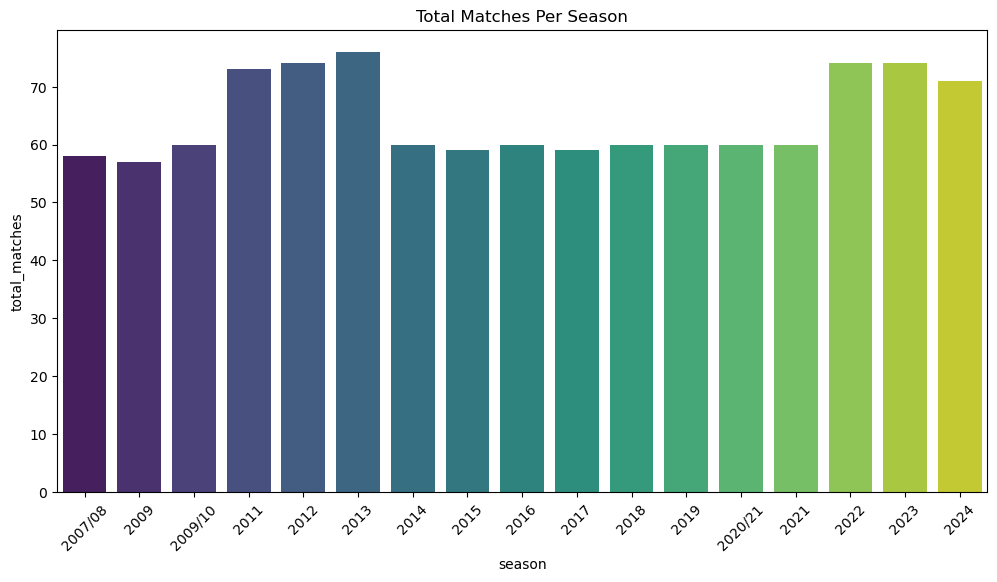

In [23]:
# Extract unique seasons & count matches
matches_per_season = matches.groupby('season')['id'].count().reset_index().rename(columns={'id': 'total_matches'})
print(matches_per_season)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x='season', y='total_matches', hue='season', data=matches_per_season, dodge=False, palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title('Total Matches Per Season')
plt.show()


                           team  total_wins
0                Mumbai Indians         144
1           Chennai Super Kings         138
2         Kolkata Knight Riders         131
3   Royal Challengers Bangalore         116
4              Rajasthan Royals         112
5               Kings XI Punjab          88
6           Sunrisers Hyderabad          88
7              Delhi Daredevils          67
8                Delhi Capitals          48
9               Deccan Chargers          29
10               Gujarat Titans          28
11                 Punjab Kings          24
12         Lucknow Super Giants          24
13                Gujarat Lions          13
14                Pune Warriors          12
15       Rising Pune Supergiant          10
16  Royal Challengers Bengaluru           7
17         Kochi Tuskers Kerala           6
18      Rising Pune Supergiants           5
19                           NA           5


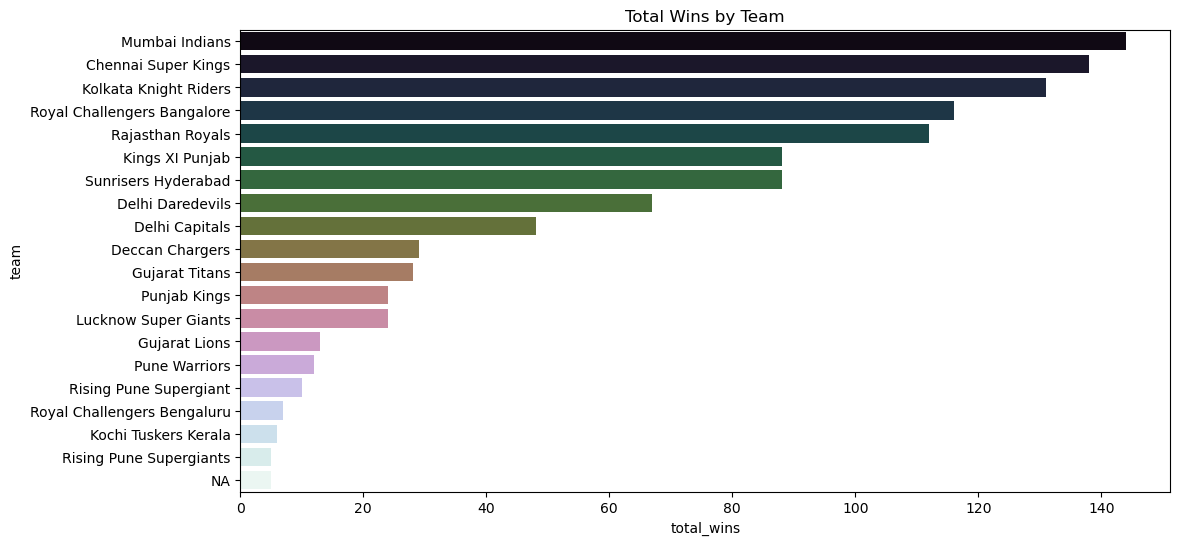

In [24]:
# Count wins by winner column
wins_by_team = matches['winner'].value_counts().reset_index()
wins_by_team.columns = ['team', 'total_wins']
print(wins_by_team)

plt.figure(figsize=(12,6))
sns.barplot(x='total_wins', y='team', hue='team', data=wins_by_team, dodge=False, legend=False, palette='cubehelix')
plt.title('Total Wins by Team')
plt.show()


  toss_win_and_match_win  count
0                    Yes    554
1                     No    541
Percentage of matches where toss winner also won: 50.59%


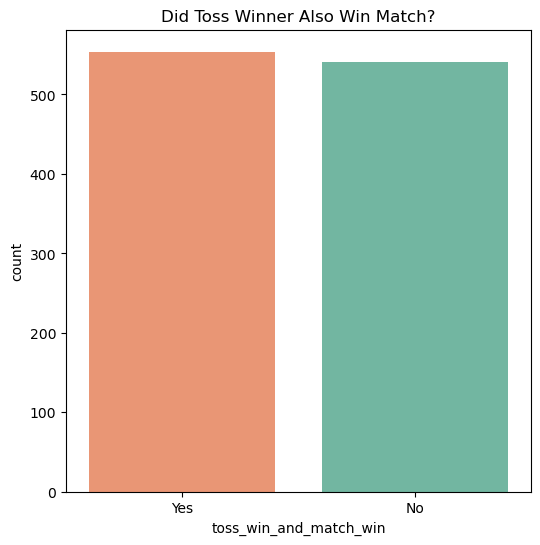

In [27]:
# New column: did team who won toss win match?
matches['toss_win_match_win'] = np.where(matches['toss_winner'] == matches['winner'], 'Yes', 'No')

# Count
toss_impact = matches['toss_win_match_win'].value_counts().reset_index()
toss_impact.columns = ['toss_win_and_match_win', 'count']
print(toss_impact)

# % chance
percent = toss_impact.loc[toss_impact['toss_win_and_match_win']=='Yes', 'count'].values[0] / toss_impact['count'].sum()
print(f"Percentage of matches where toss winner also won: {percent*100:.2f}%")

plt.figure(figsize=(6,6))
sns.barplot(x='toss_win_and_match_win', y='count', hue='count', dodge=False, legend=False, data=toss_impact, palette='Set2')
plt.title('Did Toss Winner Also Win Match?')
plt.show()


                                        venue  matches_hosted
0                                Eden Gardens              77
1                            Wankhede Stadium              73
2                       M Chinnaswamy Stadium              65
3                            Feroz Shah Kotla              60
4   Rajiv Gandhi International Stadium, Uppal              49
5             MA Chidambaram Stadium, Chepauk              48
6                      Sawai Mansingh Stadium              47
7         Dubai International Cricket Stadium              46
8                    Wankhede Stadium, Mumbai              45
9  Punjab Cricket Association Stadium, Mohali              35


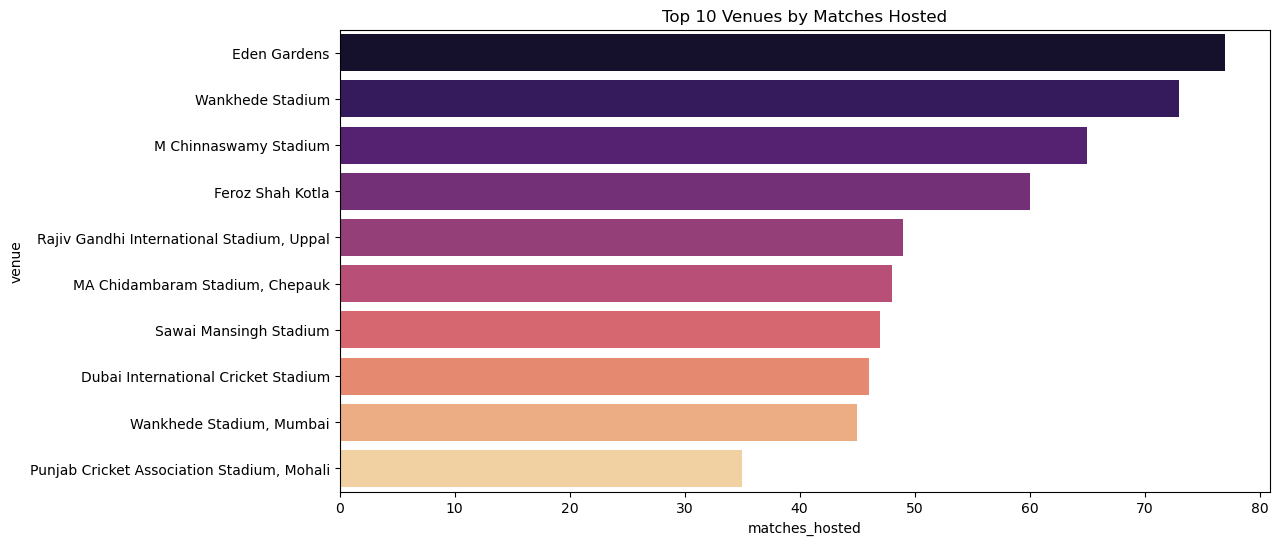

In [29]:
venue_counts = matches['venue'].value_counts().reset_index()
venue_counts.columns = ['venue', 'matches_hosted']
print(venue_counts.head(10))

plt.figure(figsize=(12,6))
sns.barplot(y='venue', x='matches_hosted', hue='venue', dodge=False, legend=False, data=venue_counts.head(10), palette='magma')
plt.title('Top 10 Venues by Matches Hosted')
plt.show()


           player  awards
0  AB de Villiers      25
1        CH Gayle      22
2       RG Sharma      19
3       DA Warner      18
4         V Kohli      18
5        MS Dhoni      17
6       SR Watson      16
7       YK Pathan      16
8       RA Jadeja      16
9      AD Russell      15


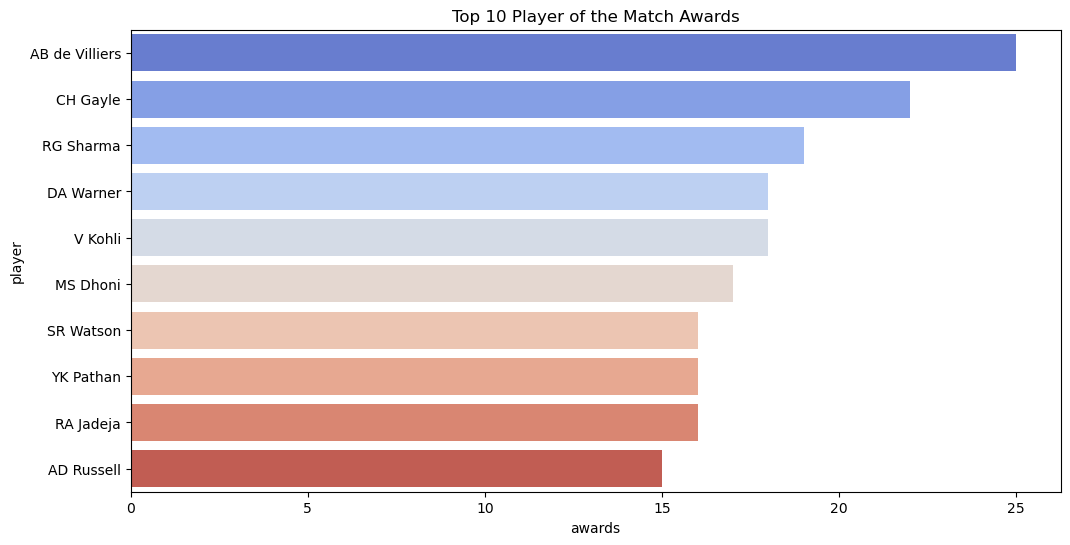

In [31]:
pom_awards = matches['player_of_match'].value_counts().reset_index().head(10)
pom_awards.columns = ['player', 'awards']
print(pom_awards)

plt.figure(figsize=(12,6))
sns.barplot(x='awards', y='player', hue='player', dodge=False, legend=False, data=pom_awards, palette='coolwarm')
plt.title('Top 10 Player of the Match Awards')
plt.show()


             batter  batsman_runs
631         V Kohli          8014
512        S Dhawan          6769
477       RG Sharma          6630
147       DA Warner          6567
546        SK Raina          5536
374        MS Dhoni          5243
30   AB de Villiers          5181
124        CH Gayle          4997
501      RV Uthappa          4954
282      KD Karthik          4843


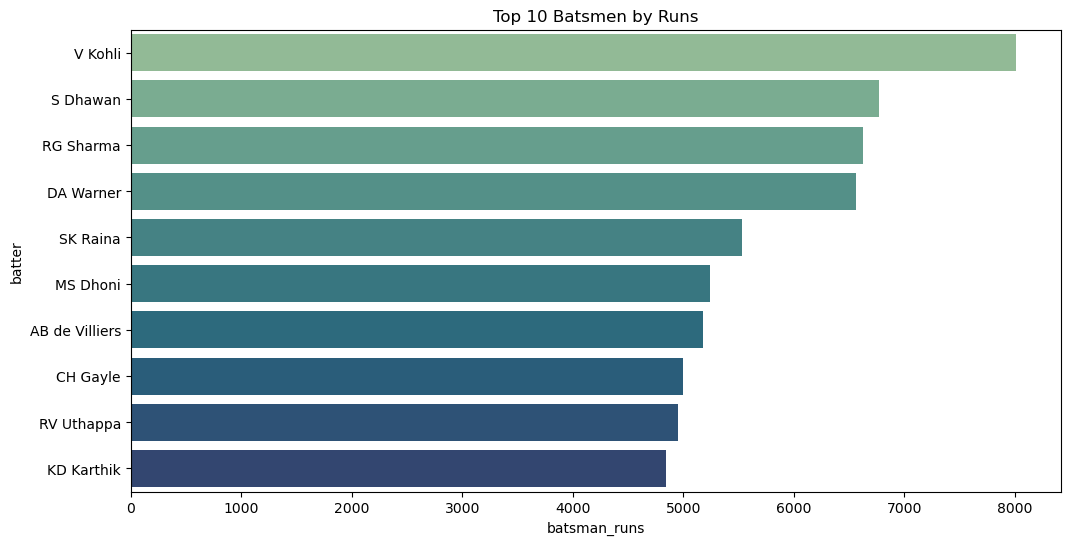

In [32]:
# Sum batsman runs from deliveries
top_batsmen = deliveries.groupby('batter')['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs', ascending=False).head(10)
print(top_batsmen)

plt.figure(figsize=(12,6))
sns.barplot(x='batsman_runs', y='batter', hue='batter', dodge=False, legend=False, data=top_batsmen, palette='crest')
plt.title('Top 10 Batsmen by Runs')
plt.show()


         bowler  is_wicket
449   YS Chahal        213
104    DJ Bravo        207
301   PP Chawla        201
383   SP Narine        200
308    R Ashwin        198
63      B Kumar        195
376  SL Malinga        188
7      A Mishra        183
171   JJ Bumrah        182
323   RA Jadeja        169


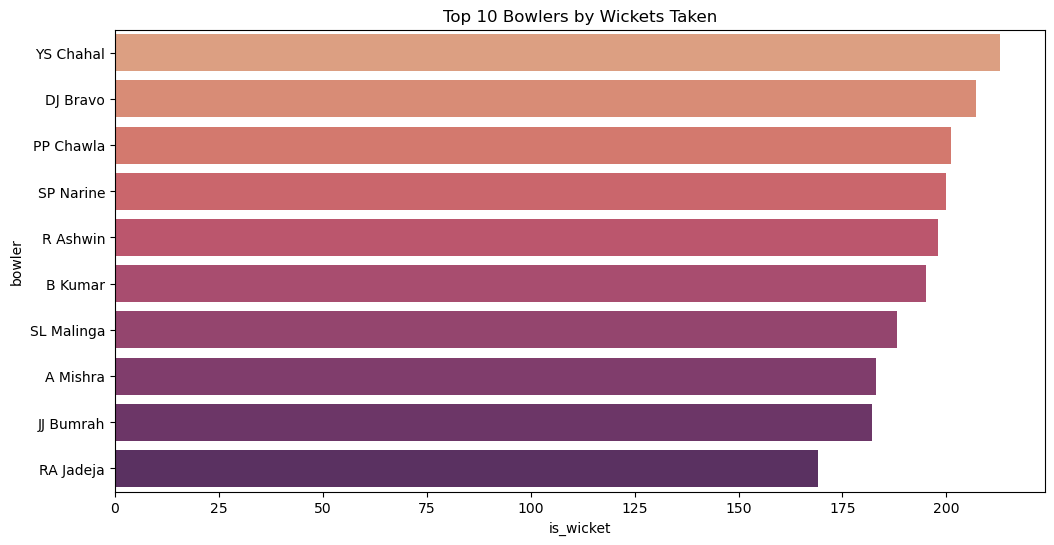

In [33]:
# Wickets: is_wicket == 1 & player_dismissed not NA
wickets = deliveries[deliveries['is_wicket'] == 1]
top_bowlers = wickets.groupby('bowler')['is_wicket'].count().reset_index().sort_values(by='is_wicket', ascending=False).head(10)
print(top_bowlers)

plt.figure(figsize=(12,6))
sns.barplot(x='is_wicket', y='bowler', hue='bowler', dodge=False, legend=False, data=top_bowlers, palette='flare')
plt.title('Top 10 Bowlers by Wickets Taken')
plt.show()


    over  total_runs
0      0    0.981663
1      1    1.173528
2      2    1.316099
3      3    1.356538
4      4    1.369100
5      5    1.373055
6      6    1.103107
7      7    1.189948
8      8    1.242087
9      9    1.224577
10    10    1.262623
11    11    1.287686
12    12    1.301240
13    13    1.343645
14    14    1.393504
15    15    1.434273
16    16    1.498778
17    17    1.587839
18    18    1.646896
19    19    1.776855


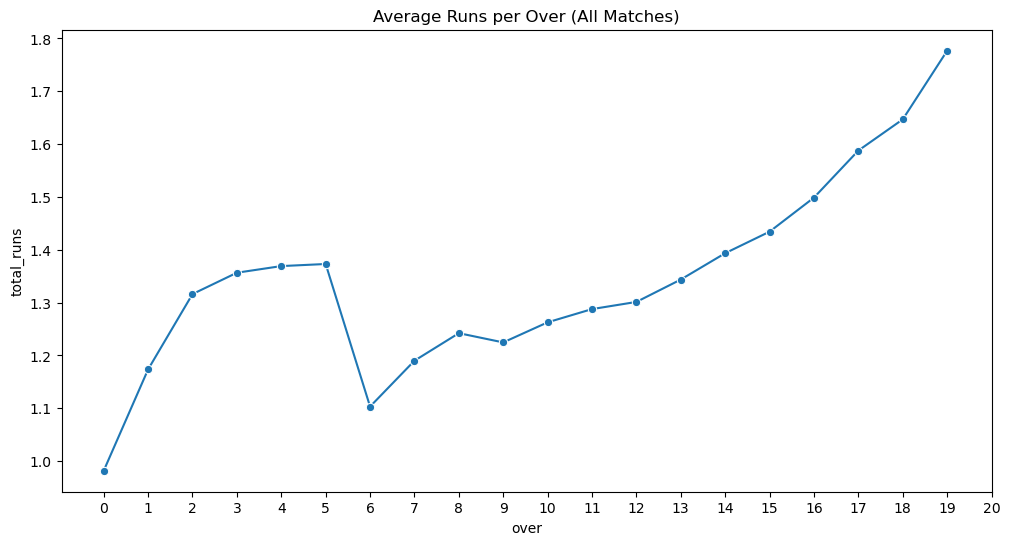

In [36]:
# Average runs per over (all overs)
runs_per_over = deliveries.groupby('over')['total_runs'].mean().reset_index()
print(runs_per_over)

plt.figure(figsize=(12,6))
sns.lineplot(x='over', y='total_runs', data=runs_per_over, marker='o')
plt.title('Average Runs per Over (All Matches)')
plt.xticks(range(0,21))
plt.show()


In [37]:
matches_per_season.to_csv('../data/matches_per_season.csv', index=False)
top_batsmen.to_csv('../data/top_batsmen.csv', index=False)


In [40]:
runs_per_over.to_csv('../data/runs_per_over.csv', index=False)
pom_awards.to_csv('../data/pom_awards.csv', index=False)
venue_counts.to_csv('../data/venue_counts.csv', index=False)
wins_by_team.to_csv('../data/wins_by_teams.csv', index=False)
top_bowlers.to_csv('../data/top_bowlers.csv', index=False)

In [43]:
toss_impact.to_csv('../data/toss_impact.csv', index=False)

In [44]:
matches['toss_win_match_win'].to_csv('../data/toss_win_impact.csv', index=False)

In [48]:
print("Venue Names:", sorted(matches['venue'].unique()))

Venue Names: ['Arun Jaitley Stadium', 'Arun Jaitley Stadium, Delhi', 'Barabati Stadium', 'Barsapara Cricket Stadium, Guwahati', 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow', 'Brabourne Stadium', 'Brabourne Stadium, Mumbai', 'Buffalo Park', 'De Beers Diamond Oval', 'Dr DY Patil Sports Academy', 'Dr DY Patil Sports Academy, Mumbai', 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam', 'Dubai International Cricket Stadium', 'Eden Gardens', 'Eden Gardens, Kolkata', 'Feroz Shah Kotla', 'Green Park', 'Himachal Pradesh Cricket Association Stadium', 'Himachal Pradesh Cricket Association Stadium, Dharamsala', 'Holkar Cricket Stadium', 'JSCA International Stadium Complex', 'Kingsmead', 'M Chinnaswamy Stadium', 'M Chinnaswamy Stadium, Bengaluru', 'M.Chinnaswamy Stadium', 'MA Chidambaram Stadium', 'MA Chidambaram Stadium, Chepauk', 'MA Chidambaram Stadium, Chepauk, Chennai', 'Maharaja Yadavindra Sing

In [51]:
matches['venue'] = matches['venue'].replace({'Arun Jaitley Stadium':'Arun Jaitley Stadium, Delhi'})
matches['venue'] = matches['venue'].replace({'Brabourne Stadium':'Brabourne Stadium, Mumbai'})
matches['venue'] = matches['venue'].replace({'Dr DY Patil Sports Academy': 'Dr DY Patil Sports Academy, Mumbai'})
matches['venue'] = matches['venue'].replace({'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam'})
matches['venue'] = matches['venue'].replace({'Eden Gardens': 'Eden Gardens, Kolkata'})
matches['venue'] = matches['venue'].replace({'Himachal Pradesh Cricket Association Stadium': 'Himachal Pradesh Cricket Association Stadium, Dharamsala'})
matches['venue'] = matches['venue'].replace({'M Chinnaswamy Stadium': 'M Chinnaswamy Stadium, Bengaluru'})
matches['venue'] = matches['venue'].replace({'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium, Bengaluru'})
matches['venue'] = matches['venue'].replace({'MA Chidambaram Stadium': 'MA Chidambaram Stadium, Chennai'})
matches['venue'] = matches['venue'].replace({'MA Chidambaram Stadium, Chepauk, Chennai':'MA Chidambaram Stadium, Chennai'})
matches['venue'] = matches['venue'].replace({'Maharashtra Cricket Association Stadium': 'Maharashtra Cricket Association Stadium, Pune'})
matches['venue'] = matches['venue'].replace({'Punjab Cricket Association IS Bindra Stadium': 'Punjab Cricket Association IS Bindra Stadium, Mohali'})
matches['venue'] = matches['venue'].replace({'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh': 'Punjab Cricket Association IS Bindra Stadium, Mohali'})
matches['venue'] = matches['venue'].replace({'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium, Mohali'})
matches['venue'] = matches['venue'].replace({'Rajiv Gandhi International Stadium': 'Rajiv Gandhi International Stadium, Hyderabad'})
matches['venue'] = matches['venue'].replace({'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium, Hyderabad'})
matches['venue'] = matches['venue'].replace({'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 'Rajiv Gandhi International Stadium, Hyderabad'})
matches['venue'] = matches['venue'].replace({'Sawai Mansingh Stadium': 'Sawai Mansingh Stadium, Jaipur'})
matches['venue'] = matches['venue'].replace({'Wankhede Stadium': 'Wankhede Stadium, Mumbai'})




In [52]:
print("Venue Names:", sorted(matches['venue'].unique()))

Venue Names: ['Arun Jaitley Stadium, Delhi', 'Barabati Stadium', 'Barsapara Cricket Stadium, Guwahati', 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow', 'Brabourne Stadium, Mumbai', 'Buffalo Park', 'De Beers Diamond Oval', 'Dr DY Patil Sports Academy, Mumbai', 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam', 'Dubai International Cricket Stadium', 'Eden Gardens, Kolkata', 'Feroz Shah Kotla', 'Green Park', 'Himachal Pradesh Cricket Association Stadium, Dharamsala', 'Holkar Cricket Stadium', 'JSCA International Stadium Complex', 'Kingsmead', 'M Chinnaswamy Stadium, Bengaluru', 'MA Chidambaram Stadium, Chennai', 'MA Chidambaram Stadium, Chepauk', 'Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur', 'Maharashtra Cricket Association Stadium, Pune', 'Narendra Modi Stadium, Ahmedabad', 'Nehru Stadium', 'New Wanderers Stadium', 'Newlands', 'OUTsurance Oval', 'Punjab Cricket Association IS Bindra Stadium, Mohali', 'Rajiv Gandhi Intern

In [53]:
matches['venue'] = matches['venue'].replace({'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium, Chennai'})


In [54]:
print("Venue Names:", matches['venue'].unique())

Venue Names: ['M Chinnaswamy Stadium, Bengaluru'
 'Punjab Cricket Association IS Bindra Stadium, Mohali' 'Feroz Shah Kotla'
 'Wankhede Stadium, Mumbai' 'Eden Gardens, Kolkata'
 'Sawai Mansingh Stadium, Jaipur'
 'Rajiv Gandhi International Stadium, Hyderabad'
 'MA Chidambaram Stadium, Chennai' 'Dr DY Patil Sports Academy, Mumbai'
 'Newlands' "St George's Park" 'Kingsmead' 'SuperSport Park'
 'Buffalo Park' 'New Wanderers Stadium' 'De Beers Diamond Oval'
 'OUTsurance Oval' 'Brabourne Stadium, Mumbai'
 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium, Dharamsala'
 'Nehru Stadium' 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam'
 'Subrata Roy Sahara Stadium'
 'Maharashtra Cricket Association Stadium, Pune'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai 

                                               venue  matches_hosted
0                           Wankhede Stadium, Mumbai             118
1                   M Chinnaswamy Stadium, Bengaluru              94
2                              Eden Gardens, Kolkata              93
3                    MA Chidambaram Stadium, Chennai              85
4      Rajiv Gandhi International Stadium, Hyderabad              77
5  Punjab Cricket Association IS Bindra Stadium, ...              61
6                                   Feroz Shah Kotla              60
7                     Sawai Mansingh Stadium, Jaipur              57
8                Dubai International Cricket Stadium              46
9                 Dr DY Patil Sports Academy, Mumbai              37


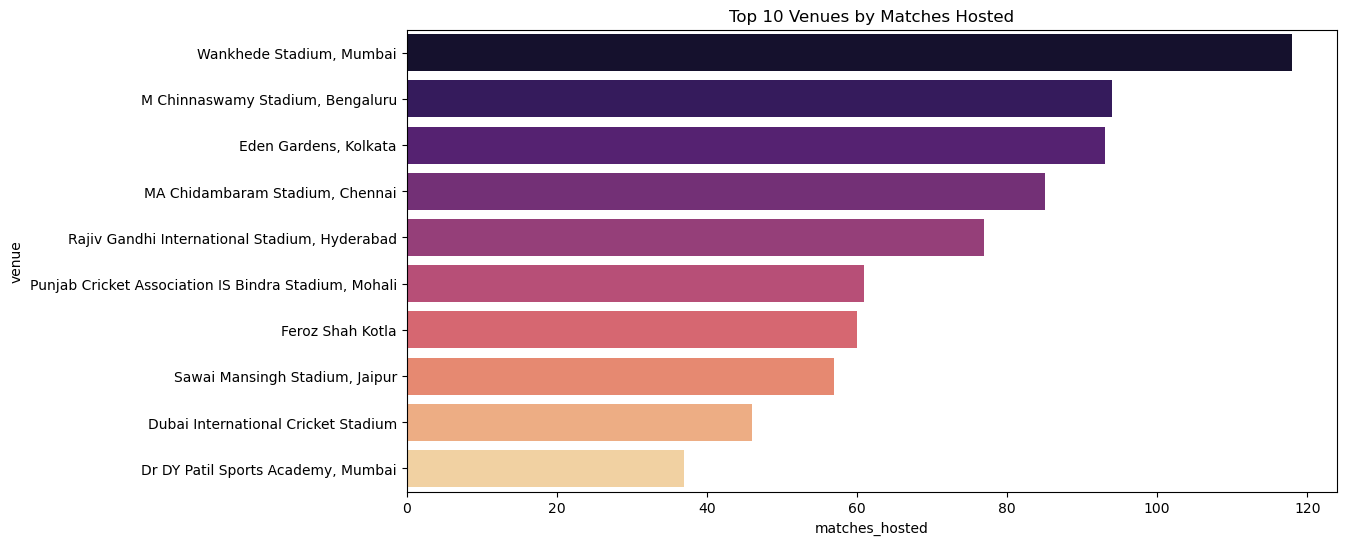

In [55]:
venue_counts = matches['venue'].value_counts().reset_index()
venue_counts.columns = ['venue', 'matches_hosted']
print(venue_counts.head(10))

plt.figure(figsize=(12,6))
sns.barplot(y='venue', x='matches_hosted', hue='venue', dodge=False, legend=False, data=venue_counts.head(10), palette='magma')
plt.title('Top 10 Venues by Matches Hosted')
plt.show()

In [56]:
venue_counts.to_csv('../data/tot_venue_counts.csv', index=False)

In [6]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('../database/ipl.sqlite')
matches = pd.read_sql_query("SELECT * FROM matches;", conn)

#matches played as team1
team1_matches = matches.groupby(['season', 'team1']).size().reset_index(name='matches_played')
team1_matches = team1_matches.rename(columns={'team1':'team'})
#matches played as team2
team2_matches = matches.groupby(['season', 'team2']).size().reset_index(name='matches_played')
team2_matches = team2_matches.rename(columns={'team2':'team'})
#combine both
matches_played = pd.concat([team1_matches, team2_matches])

matches_played = matches_played.groupby(['season', 'team'])['matches_played'].sum().reset_index()

matches_won = matches.groupby(['season', 'winner']).size().reset_index(name='matches_won')
matches_won = matches_won.rename(columns={'winner':'team'})

season_team_summary = matches_played.merge(matches_won, on=['season', 'team'], how='left')
season_team_summary['matches_won'] = season_team_summary['matches_won'].fillna(0).astype(int)

print(season_team_summary.head())

season_team_summary.to_csv('../data/season_team_summary.csv', index=False)

    season                   team  matches_played  matches_won
0  2007/08    Chennai Super Kings              16            9
1  2007/08        Deccan Chargers              14            2
2  2007/08       Delhi Daredevils              14            7
3  2007/08        Kings XI Punjab              15           10
4  2007/08  Kolkata Knight Riders              13            6


In [9]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('../database/ipl.sqlite')
print(pd.read_sql_query("SELECT * FROM matches LIMIT 5;", conn))
print(pd.read_sql_query("SELECT * FROM deliveries LIMIT 5;", conn))

       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

In [8]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('../database/ipl.sqlite')
print(pd.read_sql_query("SELECT DISTINCT batting_team from deliveries;", conn))
      

                   batting_team
0         Kolkata Knight Riders
1   Royal Challengers Bangalore
2           Chennai Super Kings
3               Kings XI Punjab
4              Rajasthan Royals
5              Delhi Daredevils
6                Mumbai Indians
7               Deccan Chargers
8          Kochi Tuskers Kerala
9                 Pune Warriors
10          Sunrisers Hyderabad
11      Rising Pune Supergiants
12                Gujarat Lions
13       Rising Pune Supergiant
14               Delhi Capitals
15                 Punjab Kings
16         Lucknow Super Giants
17               Gujarat Titans
18  Royal Challengers Bengaluru


In [11]:
deliveries = pd.read_sql_query("SELECT * FROM deliveries;", conn)

deliveries['batting_team'] = deliveries['batting_team'].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'})
deliveries['bowling_team'] = deliveries['bowling_team'].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'})
deliveries['batting_team'] = deliveries['batting_team'].replace({'Delhi Daredevils':'Delhi Capitals'})
deliveries['bowling_team'] = deliveries['bowling_team'].replace({'Delhi Daredevils':'Delhi Capitals'})
deliveries['batting_team'] = deliveries['batting_team'].replace({'Gujarat Lions':'Gujarat Titans'})
deliveries['bowling_team'] = deliveries['bowling_team'].replace({'Gujarat Lions':'Gujarat Titans'})
deliveries['batting_team'] = deliveries['batting_team'].replace({'Royal Challengers Bangalore':'Royal Challengers Bangaluru'})
deliveries['bowling_team'] = deliveries['bowling_team'].replace({'Royal Challengers Bangalore':'Royal Challengers Bangaluru'})
deliveries['batting_team'] = deliveries['batting_team'].replace({'Kings XI Punjab':'Punjab Kings'})
deliveries['bowling_team'] = deliveries['bowling_team'].replace({'Kings XI Punjab':'Punjab Kings'})

In [23]:
print(type(deliveries))
deliveries['batting_team'] = deliveries['batting_team'].replace({'Royal Challengers Bangaluru':'Royal Challengers Bengaluru'})
deliveries['bowling_team'] = deliveries['bowling_team'].replace({'Royal Challengers Bangaluru':'Royal Challengers Bengaluru'})

print(deliveries["batting_team"].unique())
print(deliveries["bowling_team"].unique())

<class 'pandas.core.frame.DataFrame'>
['Kolkata Knight Riders' 'Royal Challengers Bengaluru'
 'Chennai Super Kings' 'Punjab Kings' 'Rajasthan Royals' 'Delhi Capitals'
 'Mumbai Indians' 'Deccan Chargers' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Titans'
 'Lucknow Super Giants']
['Royal Challengers Bengaluru' 'Kolkata Knight Riders' 'Punjab Kings'
 'Chennai Super Kings' 'Delhi Capitals' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Titans'
 'Lucknow Super Giants']


In [24]:
deliveries.to_csv('../data/deliveries_cleaned.csv', index=False)

In [32]:
matches = pd.read_sql_query('SELECT * FROM matches;', conn)
print(matches.columns)
print(matches['team1'].unique())


Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals'
 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans'
 'Royal Challengers Bengaluru']


In [34]:
matches_clean = pd.read_sql_query("SELECT * FROM matches_clean;", conn)

DatabaseError: Execution failed on sql 'SELECT * FROM matches_clean;': no such table: matches_clean

In [35]:
conn.close();

In [36]:
conn = sqlite3.connect('../database/ipl.sqlite')

In [38]:
matches_clean = pd.read_sql_query("SELECT * FROM matches_clean;", conn)
print(matches_clean['team1'].unique())
print(matches_clean['winner'].unique())


DatabaseError: Execution failed on sql 'SELECT * FROM matches_clean;': no such table: matches_clean

In [4]:
import sqlite3
import pandas as pd

# Connect to your SQLite DB
conn = sqlite3.connect('../database/ipl.sqlite')


tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

print(tables)

            name
0     deliveries
1        matches
2  matches_clean


In [7]:
matches_clean = pd.read_sql_query("SELECT * FROM matches_clean;", conn)
print(matches_clean['team1'].unique())
print(matches_clean['winner'].unique())
print(matches_clean.columns)


['Royal Challengers Bengaluru' 'Punjab Kings' 'Delhi Capitals'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Titans'
 'Rising Pune Supergiants' 'Lucknow Super Giants']
['Kolkata Knight Riders' 'Chennai Super Kings' 'Delhi Daredevils'
 'Royal Challengers Bangalore' 'Rajasthan Royals' 'Kings XI Punjab'
 'Deccan Chargers' 'Mumbai Indians' 'Pune Warriors' 'Kochi Tuskers Kerala'
 'NA' 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Delhi Capitals' 'Punjab Kings' 'Gujarat Titans'
 'Lucknow Super Giants' 'Royal Challengers Bengaluru']
Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')


In [8]:
matches_clean['toss_winner'] = matches_clean['toss_winner'].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'})
matches_clean['winner'] = matches_clean['winner'].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'})
matches_clean['toss_winner'] = matches_clean['toss_winner'].replace({'Delhi Daredevils':'Delhi Capitals'})
matches_clean['winner'] = matches_clean['winner'].replace({'Delhi Daredevils':'Delhi Capitals'})
matches_clean['toss_winner'] = matches_clean['toss_winner'].replace({'Gujarat Lions':'Gujarat Titans'})
matches_clean['winner'] = matches_clean['winner'].replace({'Gujarat Lions':'Gujarat Titans'})
matches_clean['toss_winner'] = matches_clean['toss_winner'].replace({'Royal Challengers Bangalore':'Royal Challengers Bengaluru'})
matches_clean['winner'] = matches_clean['winner'].replace({'Royal Challengers Bangalore':'Royal Challengers Bengaluru'})
matches_clean['toss_winner'] = matches_clean['toss_winner'].replace({'Kings XI Punjab':'Punjab Kings'})
matches_clean['winner'] = matches_clean['winner'].replace({'Kings XI Punjab':'Punjab Kings'})


In [10]:
print(matches_clean['team1'].unique())
print(matches_clean['winner'].unique())
print(matches_clean['toss_winner'].unique())
print(matches_clean.columns)

['Royal Challengers Bengaluru' 'Punjab Kings' 'Delhi Capitals'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Titans'
 'Rising Pune Supergiants' 'Lucknow Super Giants']
['Kolkata Knight Riders' 'Chennai Super Kings' 'Delhi Capitals'
 'Royal Challengers Bengaluru' 'Rajasthan Royals' 'Punjab Kings'
 'Deccan Chargers' 'Mumbai Indians' 'Pune Warriors' 'Kochi Tuskers Kerala'
 'NA' 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Titans'
 'Lucknow Super Giants']
['Royal Challengers Bengaluru' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Punjab Kings' 'Kolkata Knight Riders'
 'Delhi Capitals' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Sunrisers Hyderabad' 'Gujarat Titans' 'Rising Pune Supergiants'
 'Lucknow Super Giants']
Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'tos

In [11]:
matches_clean.to_csv('../data/matches_clean.csv', index=False)

In [12]:
deliveries = pd.read_sql_query("SELECT * FROM deliveries;", conn)
print(deliveries.columns)


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [15]:
matches = pd.read_csv('../data/matches_clean.csv')

# Get all unique team1 + team2 appearances
team1 = matches[['team1', 'id']].rename(columns={'team1': 'team'})
team2 = matches[['team2', 'id']].rename(columns={'team2': 'team'})

all_matches = pd.concat([team1, team2])
matches_per_team = all_matches.groupby('team').nunique().reset_index()
matches_per_team = matches_per_team.rename(columns={'id': 'total_matches'})

print(matches_per_team)


                           team  total_matches
0           Chennai Super Kings            238
1               Deccan Chargers             75
2                Delhi Capitals            252
3                Gujarat Titans             75
4          Kochi Tuskers Kerala             14
5         Kolkata Knight Riders            251
6          Lucknow Super Giants             44
7                Mumbai Indians            261
8                 Pune Warriors             46
9                  Punjab Kings            246
10             Rajasthan Royals            221
11      Rising Pune Supergiants             30
12  Royal Challengers Bengaluru            255
13          Sunrisers Hyderabad            182


In [19]:
deliveries = pd.read_csv('deliveries_cleaned.csv')

runs_per_team = deliveries.groupby('batting_team')['total_runs'].sum().reset_index()
runs_per_team = runs_per_team.rename(columns={'total_runs': 'total_runs_scored'})

print(runs_per_team)


                   batting_team  total_runs_scored
0           Chennai Super Kings              38629
1               Deccan Chargers              11463
2                Delhi Capitals              39196
3                Gujarat Titans              12619
4          Kochi Tuskers Kerala               1901
5         Kolkata Knight Riders              39331
6          Lucknow Super Giants               7510
7                Mumbai Indians              42176
8                 Pune Warriors               6358
9                  Punjab Kings              39600
10             Rajasthan Royals              34747
11      Rising Pune Supergiants               4533
12  Royal Challengers Bengaluru              40622
13          Sunrisers Hyderabad              29071


In [20]:
wickets_per_team = deliveries[deliveries['is_wicket'] == 1].groupby('bowling_team').size().reset_index(name='total_wickets')

print(wickets_per_team)


                   bowling_team  total_wickets
0           Chennai Super Kings           1481
1               Deccan Chargers            446
2                Delhi Capitals           1498
3                Gujarat Titans            449
4          Kochi Tuskers Kerala             74
5         Kolkata Knight Riders           1464
6          Lucknow Super Giants            264
7                Mumbai Indians           1591
8                 Pune Warriors            238
9                  Punjab Kings           1411
10             Rajasthan Royals           1277
11      Rising Pune Supergiants            189
12  Royal Challengers Bengaluru           1494
13          Sunrisers Hyderabad           1074


In [21]:
# Rename for merge consistency
wickets_per_team = wickets_per_team.rename(columns={'bowling_team': 'team'})
runs_per_team = runs_per_team.rename(columns={'batting_team': 'team'})

# Merge step-by-step
merged = matches_per_team.merge(runs_per_team, on='team').merge(wickets_per_team, on='team')

# Add averages
merged['avg_runs_per_match'] = merged['total_runs_scored'] / merged['total_matches']
merged['avg_wickets_per_match'] = merged['total_wickets'] / merged['total_matches']

print(merged)


                           team  total_matches  total_runs_scored  \
0           Chennai Super Kings            238              38629   
1               Deccan Chargers             75              11463   
2                Delhi Capitals            252              39196   
3                Gujarat Titans             75              12619   
4          Kochi Tuskers Kerala             14               1901   
5         Kolkata Knight Riders            251              39331   
6          Lucknow Super Giants             44               7510   
7                Mumbai Indians            261              42176   
8                 Pune Warriors             46               6358   
9                  Punjab Kings            246              39600   
10             Rajasthan Royals            221              34747   
11      Rising Pune Supergiants             30               4533   
12  Royal Challengers Bengaluru            255              40622   
13          Sunrisers Hyderabad   

In [22]:
merged.to_csv('../data/team_performance_balance.csv', index=False)
